In [1]:
from logo import import_pmb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from concorde.tsp import TSPSolver

Shape of original points:  (7733, 2)
Shape of reduced points:  (4639, 2)


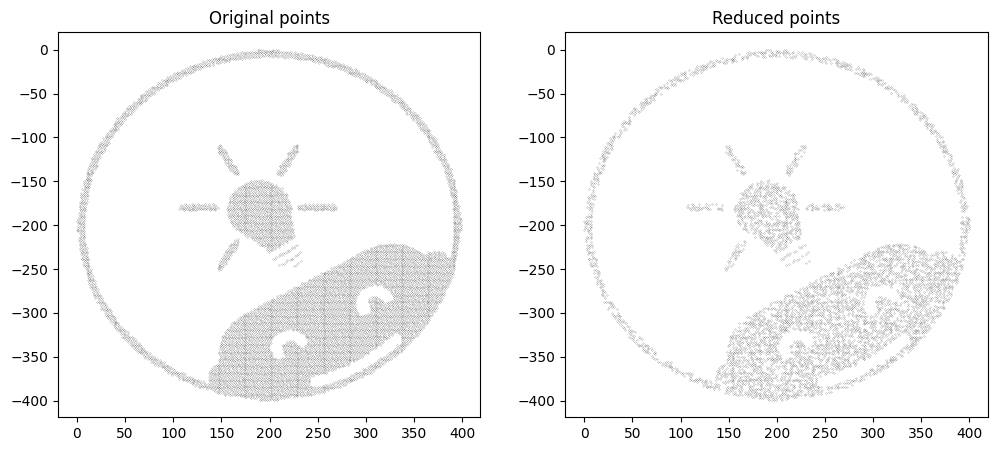

In [7]:
# Generate array of points from the PMB file
points_orig = import_pmb("design_12.pbm", 400, 400, 1.0)
print("Shape of original points: ", points_orig.shape)
points = import_pmb("design_12.pbm", 400, 400, 0.6)
print("Shape of reduced points: ", points.shape)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(points_orig[:,0], points_orig[:,1], s=0.05, marker='.', color='black')
plt.title("Original points")
plt.subplot(1,2,2)
plt.scatter(points[:,0], points[:,1], s=0.05, marker='.', color='black')
plt.title("Reduced points")
plt.show()

Number of labels:  9
Points at label 0: 3945
Points at label 1: 496
Points at label 2: 34
Points at label 3: 37
Points at label 4: 33
Points at label 5: 36
Points at label 6: 9
Points at label 7: 13
Points at label 8: 34


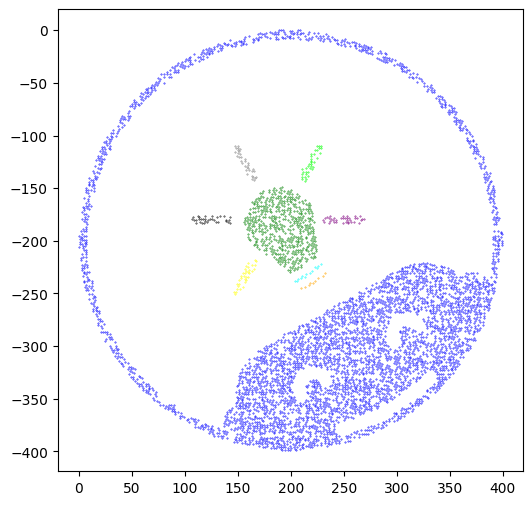

In [10]:
# Cluster the regions of points
own_colors = ["blue", "green", "yellow", "purple", "black", "lime", "orange", "cyan", "gray", "crimson", "gold", "pink"]
dbs = DBSCAN(eps=7, min_samples=3)
labels = dbs.fit_predict(points)
no_labels = len(np.unique(labels[labels != -1]))
print("Number of labels: ", no_labels)
plt.figure(figsize=(6,6))
for label in range(no_labels):
    points_label = points[labels == label]
    print(f"Points at label {label}: {len(points_label)}")
    plt.scatter(points_label[:,0], points_label[:,1], s=0.5, marker='.', color=own_colors[label])
plt.show()

Points at label 0: 1499
Points at label 1: 158
Points at label 2: 27
Points at label 3: 29
Points at label 4: 26
Points at label 5: 36
Points at label 6: 9
Points at label 7: 13
Points at label 8: 34


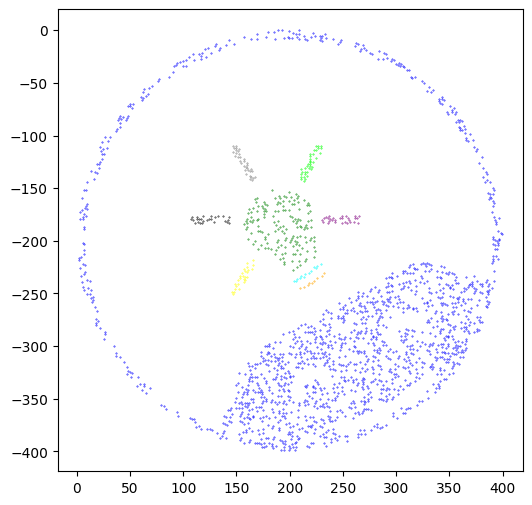

In [18]:
densities = [0.38, 0.32, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0]

plt.figure(figsize=(6,6))
for label,density in zip(range(no_labels), densities):
    points_label = points[labels == label]

    points_density = int(len(points_label) * density)
    idxs = np.random.choice(len(points_label), points_density, replace=False)
    points_label = points_label[idxs]

    print(f"Points at label {label}: {len(points_label)}")
    plt.scatter(points_label[:,0], points_label[:,1], s=0.5, marker='.', color=own_colors[label])
plt.show()

In [17]:
# Apply TSP to each cluster
label_classes = np.unique(labels[labels != -1])
plt.figure(figsize=(8,6))
for label, density in zip(range(no_labels), densities):
    points_label = points[labels == label]
    
    if len(points_label) <= 1:
        continue

    points_density = int(len(points_label) * density)
    idxs = np.random.choice(len(points_label), points_density, replace=False)
    points_label = points_label[idxs]

    solver = TSPSolver.from_data(points_label[:,0], points_label[:,1], norm="EUC_2D", name='RSA_logo')
    solution = solver.solve(verbose=False)
    assert solution.success

    path = points_label[solution.tour]
    plt.plot(path[:,0], path[:,1], linewidth=1.0, color='black')
plt.savefig('figure_lines.png', transparent=True)
plt.show()